# Milestone 5 : N body problem.

### 1. Write a function to integrate the N body problem.

In [121]:

import matplotlib.pyplot as plt
from numpy import  array, zeros, concatenate, linalg, any, reshape, linspace
from matplotlib.animation import FuncAnimation # Importante para la animación
import import_ipynb
import Numerical_schemes

def Cauchy_Problem(F,U0,t,Temporal_scheme):  #F: Funcion Rn,  #U0: vector Rn, #T: Tiempo
                                            
    N = len(t) - 1     #Número de intervalos temporales
    Nv = len(U0)         #Número de variables
    U = zeros((N+1,Nv))
    U[0,:] = U0

    for n in range(N):
        U[n+1,:] = Temporal_scheme(U[n,:],t[n],t[n+1],F)    #Respetamos la API
    return U




def NBodyProblem(Nb,Nc,Nv,r0,v0,t,Temporal_scheme): 

    Nt = len(t) 

    U0 = zeros((Nb * Nc * Nv))  
    Us = reshape(U0, (Nb, Nc, Nv))
    r = reshape(Us[:,:,0],(Nb,Nc))  # Positions
    v = reshape(Us[:,:,1], (Nb,Nc))  # Velocities


    for i in range(Nb):    #We build the vector U with the initial conditions
        r[i,:] = r0[i,:]
        v[i,:] = v0[i,:]
    
    

    def Function(X): 
            Xs = reshape(X, (Nb, Nc, Nv))
            xr = reshape(Xs[:,:,0],(Nb,Nc))  # Positions
            xv = reshape(Xs[:,:,1], (Nb,Nc))  # Velocities

            F = zeros((Nb * Nc * Nv))
            Fs = reshape(F, (Nb, Nc, Nv)) 
            drdt = reshape(Fs[:,:,0],(Nb,Nc)) #Velocities
            dvdt = reshape(Fs[:,:,1],(Nb,Nc)) #Accelerations

            for i in range(Nb):
                drdt[i,:] = xv[i,:]
                for j in range(Nb):
                    if i!=j: 
                        distancia_vect =  (xr[j,:]-xr[i,:])
                        dist = linalg.norm(xr[j,:]-xr[i,:])
                        if dist < 1:
                            dvdt[i,:] = dvdt[i,:] + (distancia_vect/(100*dist**3))
                        else :
                            dvdt[i,:] = dvdt[i,:] + (distancia_vect/(dist**3))
            return F
    
    U = Cauchy_Problem(Function,U0,t,Temporal_scheme)

    U_sol = reshape(U,(Nt,Nb,Nc,Nv))
    rsol = reshape(U_sol[:,:,:,0],(Nt,Nb,Nc))  # Positions
    vsol = reshape(U_sol[:,:,:,1],(Nt,Nb,Nc))  # Positions

    return rsol,vsol













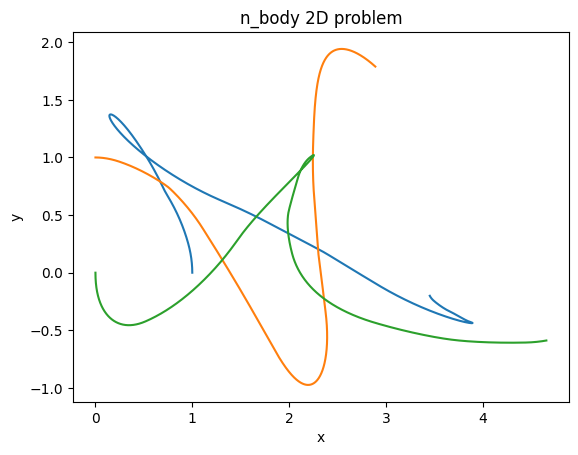

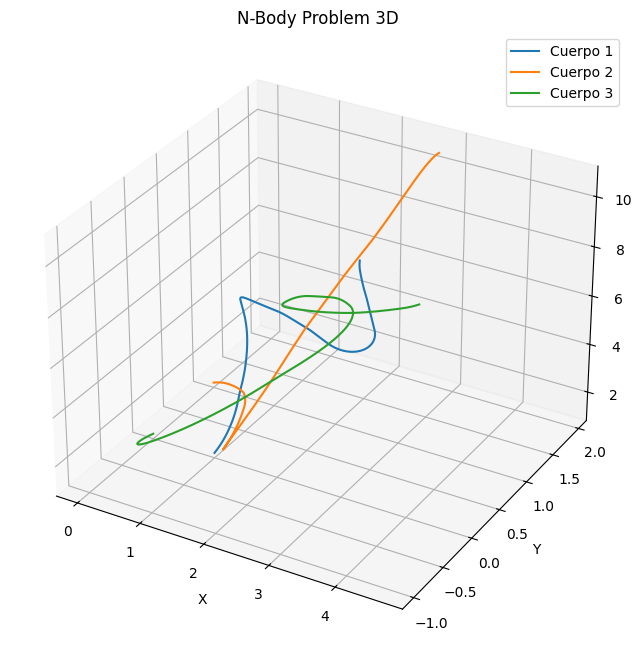

In [122]:
Nb = 3  # Number of bodies
Nc = 3  # Number of coordinates (x,y,z)
Nv = 2  # Number of variables per coordinate (position, velocity)  

r0 = zeros((Nb,Nc))
v0 = zeros((Nb,Nc))

r0[0,:] = (1,0,1) #Cuerpo 1
v0[0,:] = (0,1,1)
r0[1,:] = (0,1,1) #Cuerpo 2
v0[1,:] = (1,0,1)
r0[2,:] = (0,0,1) #Cuerpo 3
v0[2,:] = (0,-1,1)

t0 = 0
tf = 10
Np = 10000

t = linspace(t0, tf, Np)


rs,vs = NBodyProblem(Nb,Nc,Nv,r0,v0,t,Numerical_schemes.RangeKutta4) 



plt.plot(rs[:,0,0], rs[:,0,1])
plt.plot(rs[:,1,0], rs[:,1,1])
plt.plot(rs[:,2,0], rs[:,2,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_body 2D problem')
plt.show()

if Nc == 3:  ## 3D plot

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(rs[:,0,0], rs[:,0,1], rs[:,0,2], label='Cuerpo 1')
    ax.plot(rs[:,1,0], rs[:,1,1], rs[:,1,2], label='Cuerpo 2')
    ax.plot(rs[:,2,0], rs[:,2,1], rs[:,2,2], label='Cuerpo 3')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('N-Body Problem 3D')
    ax.legend()
    plt.show()